### Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [2]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Есть столец "studytime, granular", которго нет в описании дата сета.
Вряд ли он понадобится, удалим его.

In [4]:
students.drop(['studytime, granular'], inplace = True, axis = 1)

In [5]:
students.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [6]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

### Пропущенные значения
Проверим какой процент пропущенных значений в каждой колонке

In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(students)

Your selected dataframe has 29 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
pstatus,45,11.4
paid,40,10.1
famsup,39,9.9
fjob,36,9.1
internet,34,8.6
romantic,31,7.8
guardian,31,7.8
traveltime,28,7.1
famrel,27,6.8
famsize,27,6.8


### Колонка school
аббревиатура школы, в которой учится ученик

In [9]:
display(pd.DataFrame(students.school.value_counts()))
students.loc[:, ['school']].info()

print("Пропущенных значений:", students.school.isna().sum())

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 0


- 2 вида школы

### Колонка sex

пол ученика ('F' - женский, 'M' - мужской)

In [10]:
display(pd.DataFrame(students.sex.value_counts()))
students.loc[:, ['sex']].info()

print("Пропущенных значений:", students.sex.isna().sum())

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 0


- мальчиков меньше, чем девочек

### Колонка age

возраст ученика (от 15 до 22)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

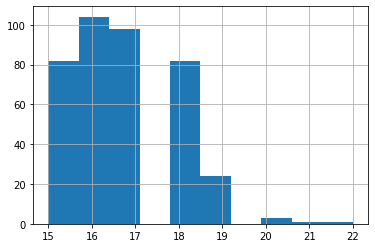

In [11]:
students.age.hist()
students.age.describe()

- большинство учеников в возрасте от 16 до 18 лет

### Колонка address

тип адреса ученика ('U' - городской, 'R' - за городом)

In [12]:
display(pd.DataFrame(students.address.value_counts()))
students.loc[:, ['address']].info()

print("Пропущенных значений:", students.address.isna().sum())

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 17


часть данных отсутствует, тем не менее можно сделать вывод, что большая часть учеников проживает в городе

### Колонка famsize

размер семьи('LE3' <= 3, 'GT3' >3)

In [13]:
display(pd.DataFrame(students.famsize.value_counts()))
students.loc[:, ['famsize']].info()

print("Пропущенных значений:", students.famsize.isna().sum())

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 27


 - можно сделать вывод, что большинство учеников из семей, где больше трех человек, т.е. вероятно больше одного ребенка

### Колонка pstatus
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [14]:
display(pd.DataFrame(students.pstatus.value_counts()))
students.loc[:, ['pstatus']].info()

print("Пропущенных значений:", students.pstatus.isna().sum())

,pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 45


 - можно предположить, что большинство живет в полной семье

### Колонка medu
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [15]:
display(pd.DataFrame(students.medu.value_counts()))
students.loc[:, ['medu']].info()

print("Пропущенных значений:", students.medu.isna().sum())

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Пропущенных значений: 3


- у трети учеников матери получили высшее образование

### Колонка fedu
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [16]:
display(pd.DataFrame(students.fedu.value_counts()))
students.loc[:, ['fedu']].info()

print("Пропущенных значений:", students.fedu.isna().sum())

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Пропущенных значений: 24


мы знаем, что оценивали по шкале от 0 до 4, поэтому 40 - явная опечатка

т.к. значений 4 явно больше 0, предполагаю, что хотели ввести 4

заменим 40 на 4

In [17]:
students.fedu = students.fedu.apply(lambda x: 4 if x == 40 else x)
display(pd.DataFrame(students.fedu.value_counts()))
students.loc[:, ['fedu']].info()

print("Пропущенных значений:", students.fedu.isna().sum())

,fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Пропущенных значений: 24


- можно сделать вывод, что средний уровень образования отцов ниже, чем у матерей

Построим гистгорамму для наглядности

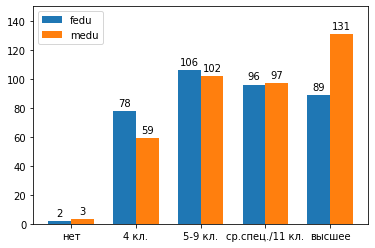

In [18]:
labels = ['нет', '4 кл.', '5-9 кл.', 'ср.спец./11 кл.', 'высшее', 'не заполнено']
fedu = [students[(students.fedu == 0)].fedu.count(), students[(students.fedu == 1)].fedu.count(),
        students[(students.fedu == 2)].fedu.count(), students[(students.fedu == 3)].fedu.count(), 
        students[(students.fedu == 4)].fedu.count()]
medu = [students[(students.medu == 0)].medu.count(), students[(students.medu == 1)].medu.count(),
        students[(students.medu == 2)].medu.count(), students[(students.medu == 3)].medu.count(), 
        students[(students.medu == 4)].medu.count()]

x = np.arange(students.fedu.nunique())
width = 0.35

fig, axis = plt.subplots()
fedu = axis.bar(x - width/2, fedu, width, label='fedu')
medu = axis.bar(x + width/2, medu, width, label='medu')
axis.legend()
axis.set_ylim(0, 150)
axis.set_xticks(x)
axis.set_xticklabels(labels)

def autolabel(edu):
    """Добавляем подпись значений каждого столбца"""
    for ed in edu:
        height = ed.get_height()
        axis.annotate('{}'.format(height),
                    xy=(ed.get_x() + ed.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(fedu)
autolabel(medu)

plt.show()

### Колонка mjob
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [19]:
display(pd.DataFrame(students.mjob.value_counts()))
students.loc[:, ['mjob']].info()

print("Пропущенных значений:", students.mjob.isna().sum())

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 19


- большинство матерей заняты на какой-либо работе

### Колонка fjob
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [20]:
display(pd.DataFrame(students.fjob.value_counts()))
students.loc[:, ['fjob']].info()

print("Пропущенных значений:", students.fjob.isna().sum())

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 36


- тенденция, что про отцов больше незаполненных значений ?
- ожидаемо, среди женщин больше домохозяек, чем среди мужчин

Построим гистограмму занятости родителей

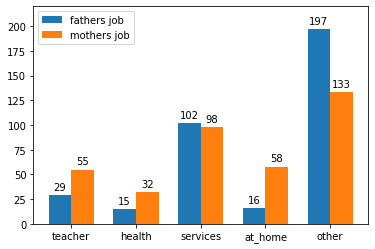

In [21]:
labels = ['teacher', 'health', 'services', 'at_home', 'other']
fjob = [students[(students.fjob == 'teacher')].fjob.count(), students[(students.fjob == 'health')].fjob.count(),
        students[(students.fjob == 'services')].fjob.count(), students[(students.fjob == 'at_home')].fjob.count(), 
        students[(students.fjob == 'other')].fjob.count()]
mjob = [students[(students.mjob == 'teacher')].mjob.count(), students[(students.mjob == 'health')].mjob.count(),
        students[(students.mjob == 'services')].mjob.count(), students[(students.mjob == 'at_home')].mjob.count(), 
        students[(students.mjob == 'other')].mjob.count()]

x = np.arange(students.fjob.nunique())
width = 0.35

fig, axis = plt.subplots()
f_job = axis.bar(x - width/2, fjob, width, label='fathers job')
m_job = axis.bar(x + width/2, mjob, width, label='mothers job')
axis.legend()
axis.set_ylim(0, 220)
axis.set_xticks(x)
axis.set_xticklabels(labels)

def autolabel(job):
    """Добавляем подпись значений каждого столбца"""
    for j in job:
        height = j.get_height()
        axis.annotate('{}'.format(height),
                    xy=(j.get_x() + j.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(f_job)
autolabel(m_job)

plt.show()

Для наглядности построим гистограмму количества пропущенных значений по отцам и матерям

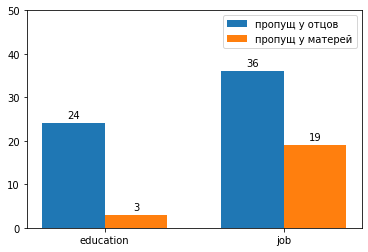

In [22]:
labels = ['education', 'job']
fathers = [students.fedu.isna().sum(), students.fjob.isna().sum()]
mothers = [students.medu.isna().sum(), students.mjob.isna().sum()]

x = np.arange(len(labels))
width = 0.35

fig, axis = plt.subplots()
fath = axis.bar(x - width/2, fathers, width, label='пропущ у отцов')
moth = axis.bar(x + width/2, mothers, width, label='пропущ у матерей')
axis.legend()
axis.set_ylim(0, 50)
axis.set_xticks(x)
axis.set_xticklabels(labels)

def autolabel(job):
    """Добавляем подпись значений каждого столбца"""
    for j in job:
        height = j.get_height()
        axis.annotate('{}'.format(height),
                    xy=(j.get_x() + j.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(fath)
autolabel(moth)

plt.show()

Данных про матерей внесено больше, чем про отцов

### Колонка reason
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [23]:
display(pd.DataFrame(students.reason.value_counts()))
students.loc[:, ['reason']].info()

print("Пропущенных значений:", students.reason.isna().sum())

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 17


- только треть ориентировалась на образовательную программу при выборе школы

### Колонка guardian
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [24]:
display(pd.DataFrame(students.guardian.value_counts()))
students.loc[:, ['guardian']].info()

print("Пропущенных значений:", students.guardian.isna().sum())

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 31


- большинство учеников находится под опекой матери

### Колонка traveltime
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [25]:
display(pd.DataFrame(students.traveltime.value_counts()))
students.loc[:, ['traveltime']].info()

print("Пропущенных значений:", students.traveltime.isna().sum())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Пропущенных значений: 28


- больше половины учеников живет в пешей доступности от школы

### Колонка studytime
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [26]:
display(pd.DataFrame(students.studytime.value_counts()))
students.loc[:, ['studytime']].info()

print("Пропущенных значений:", students.studytime.isna().sum())

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Пропущенных значений: 7


 - за пределами школы ученики в большинстве своем тратят немного времени

### Колонка failures
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [27]:
display(pd.DataFrame(students.failures.value_counts()))
students.loc[:, ['failures']].info()

print("Пропущенных значений:", students.failures.isna().sum())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Пропущенных значений: 22


- неясно как трактовать этот показатель, с одной стороны 0 может означать отсутствие неудач, что положительный показатель, с другой стороны в 0 могут включаться и больше 3 неудач, что явно отрицательный фактор 

### Колонка schoolsup
дополнительная образовательная поддержка (yes или no)

In [28]:
display(pd.DataFrame(students.schoolsup.value_counts()))
students.loc[:, ['schoolsup']].info()

print("Пропущенных значений:", students.schoolsup.isna().sum())

,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 9


- большинство учеников ограничиваются только занятиями в школе, не имеют дополнительной образовательной поддержки

### Колонка famsup
семейная образовательная поддержка (yes или no)

In [29]:
display(pd.DataFrame(students.famsup.value_counts()))
students.loc[:, ['famsup']].info()

print("Пропущенных значений:", students.famsup.isna().sum())

,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 39


- большинство учеников получает образовательную поддержку в семье

### Колонка paid
дополнительные платные занятия по математике (yes или no)

In [30]:
display(pd.DataFrame(students.paid.value_counts()))
students.loc[:, ['paid']].info()

print("Пропущенных значений:", students.paid.isna().sum())

,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 40


- много пропущенных значений, но точно можно сказать, что половина учеников не заниамется математикой дополнительно за деньги

### Колонка activities
дополнительные внеучебные занятия (yes или no)

In [31]:
display(pd.DataFrame(students.activities.value_counts()))
students.loc[:, ['activities']].info()

print("Пропущенных значений:", students.activities.isna().sum())

,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 14


- примерно одинаковое количество учеников участвуют и нет в дополнительных внеучебных занятиях 

### Колонка nursery
посещал детский сад (yes или no)

In [32]:
display(pd.DataFrame(students.nursery.value_counts()))
students.loc[:, ['nursery']].info()

print("Пропущенных значений:", students.nursery.isna().sum())

,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 16


- около 75% учеников ходили в детский сад

### Колонка higher
хочет получить высшее образование (yes или no)

In [33]:
display(pd.DataFrame(students.higher.value_counts()))
students.loc[:, ['higher']].info()

print("Пропущенных значений:", students.higher.isna().sum())

,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 20


- абсолютное большинство планирует получать высшее образование

### Колонка internet
наличие интернета дома (yes или no)

In [34]:
display(pd.DataFrame(students.internet.value_counts()))
students.loc[:, ['internet']].info()

print("Пропущенных значений:", students.internet.isna().sum())

,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 34


- как минимум у 1/8 части учеников нет доступа к интернету дома

### Колонка romantic
в романтических отношениях (yes или no)

In [35]:
display(pd.DataFrame(students.romantic.value_counts()))
students.loc[:, ['romantic']].info()

print("Пропущенных значений:", students.romantic.isna().sum())

,romantic
no,240
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Пропущенных значений: 31


- большинство учеников не состоят в романтических отношениях
- есть ли связь с возрастом и полом? Визуализируем

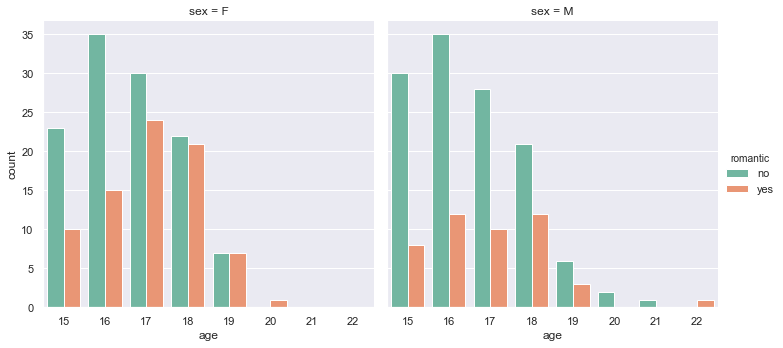

In [36]:
sns.set()
sns.catplot(x="age", hue="romantic", col = "sex", data=students, kind="count", palette="Set2")

- у учеников женского пола романтическая жизнь более насыщенная

### Колонка famrel
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [37]:
display(pd.DataFrame(students.famrel.value_counts()))
students.loc[:, ['famrel']].info()

print("Пропущенных значений:", students.famrel.isna().sum())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Пропущенных значений: 27


Среди значений есть -1, мы знаем, что оценка происходила по шкале от 1 до 5.

Либо опечатка, либо в семье настолько все плохо, что поставили -1.

Заменим -1 на 1.

In [38]:
students.famrel = students.famrel.apply(lambda x: 1 if x == -1 else x)

display(pd.DataFrame(students.famrel.value_counts()))
students.loc[:, ['famrel']].info()

print("Пропущенных значений:", students.famrel.isna().sum())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Пропущенных значений: 27


- в большинстве семей хорошие отношения
- возможно есть зависимость отношений в семье и оценок

### Колонка freetime
свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [39]:
display(pd.DataFrame(students.freetime.value_counts()))
students.loc[:, ['freetime']].info()

print("Пропущенных значений:", students.freetime.isna().sum())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Пропущенных значений: 11


- большинство отметили средний уровень свободного времени, вероятно смогли найти баланс учеба/отдых
- возможно есть зависимость свободного времени и оценок

### Колонка goout
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [40]:
display(pd.DataFrame(students.goout.value_counts()))
students.loc[:, ['goout']].info()

print("Пропущенных значений:", students.goout.isna().sum())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Пропущенных значений: 8


- как и в случае со свободным временем, проведение времени с друзьями оценили на среднем уровне
- возможно есть зависимость времени, проведенного с друзьями, и оценок

## Надо построить график, который бы учитывал все вариации свободного времени/времени с друзьями
Построим график, чтобы посмотрим как коррелируют свободное время и проведение времени с друзьями

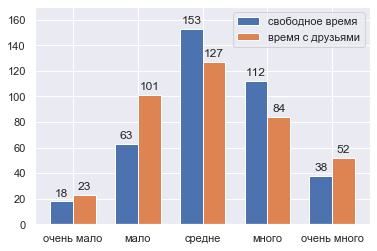

In [41]:
labels = ['очень мало', 'мало', 'средне', 'много', 'очень много']
free_time = [students[(students.freetime == 1)].freetime.count(), students[(students.freetime == 2)].freetime.count(),
        students[(students.freetime == 3)].freetime.count(), students[(students.freetime == 4)].freetime.count(), 
        students[(students.freetime == 5)].freetime.count()]
go_out = [students[(students.goout == 1)].goout.count(), students[(students.goout == 2)].goout.count(),
        students[(students.goout == 3)].goout.count(), students[(students.goout == 4)].goout.count(), 
        students[(students.goout == 5)].goout.count()]

x = np.arange(students.freetime.nunique())
width = 0.35

fig, axis = plt.subplots()
freetime = axis.bar(x - width/2, free_time, width, label='свободное время')
goout = axis.bar(x + width/2, go_out, width, label='время с друзьями')
axis.legend()
axis.set_ylim(0, 170)
axis.set_xticks(x)
axis.set_xticklabels(labels)

def autolabel(time):
    """Добавляем подпись значений каждого столбца"""
    for t in time:
        height = t.get_height()
        axis.annotate('{}'.format(height),
                    xy=(t.get_x() + t.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(freetime)
autolabel(goout)

plt.show()

### Колонка health
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [42]:
display(pd.DataFrame(students.health.value_counts()))
students.loc[:, ['health']].info()

print("Пропущенных значений:", students.health.isna().sum())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Пропущенных значений: 15


- довольно много учеников с плохим и средним состоянием здоровья

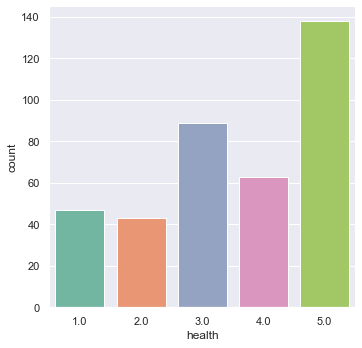

In [43]:
sns.set()
sns.catplot(x = "health", kind="count", data=students, palette="Set2")

### Колонка absences
количество пропущенных занятий

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

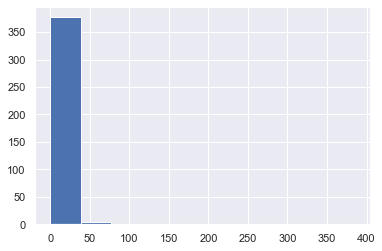

In [44]:
students.absences.hist()
students.absences.describe()

Определенно есть выбросы, очищаем с помощью формулы интерквартильного расстояния (межквартильного размаха).

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


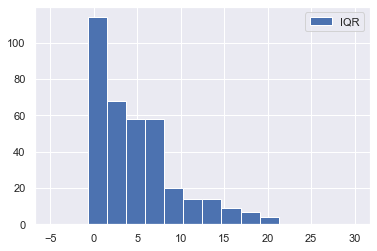

In [45]:
median = students.absences.median()
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.absences.loc[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (-5, 30), 
                                                                                             label = 'IQR')
plt.legend()

In [46]:
students = students.loc[students.absences <= 30]

count    376.000000
mean       5.127660
std        5.854656
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       30.000000
Name: absences, dtype: float64

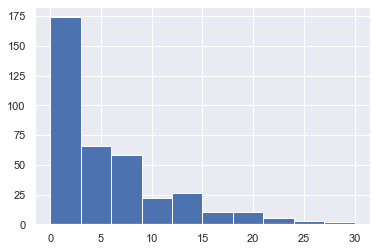

In [47]:
students.absences.hist()
students.absences.describe()

- у некоторых учеников очень много пропусков, что, вероятнее всего, отрицательно скажется на успеваемости

### Колонка score
баллы по госэкзамену по математике

count    371.00000
mean      52.03504
std       22.92989
min        0.00000
25%       40.00000
50%       55.00000
75%       70.00000
max      100.00000
Name: score, dtype: float64

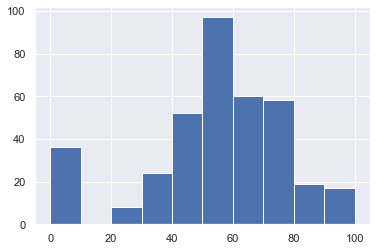

In [48]:
students.score.hist()
students.score.describe()

- некоторый % учеников сдал экзамен на оценку до 10 баллов.

## Корреляционный анализ

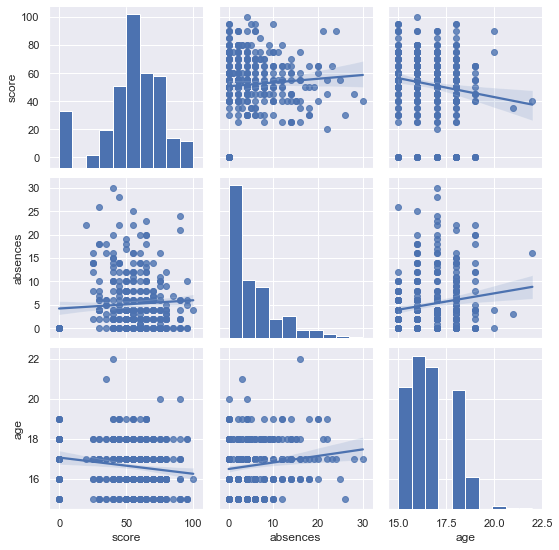

In [49]:
sns.pairplot(students, kind = 'reg', vars = ['score', 'absences', 'age'])

In [50]:
students.corr()['score'].sort_values()

failures     -0.327028
age          -0.147750
goout        -0.134559
traveltime   -0.073219
health       -0.056592
freetime      0.013149
famrel        0.061851
absences      0.068886
studytime     0.107031
fedu          0.117003
medu          0.209268
score         1.000000
Name: score, dtype: float64

- сильно коррелирующих между собой признаков нет

### Анализ номинативных данных

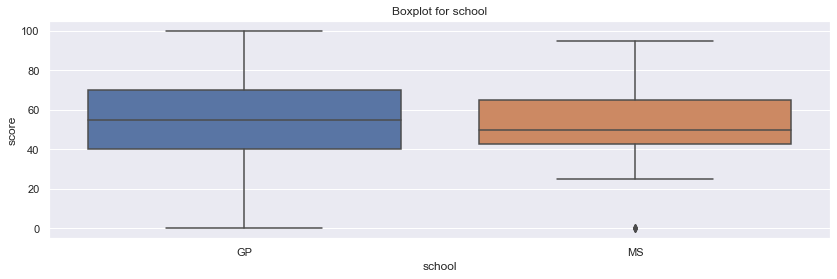

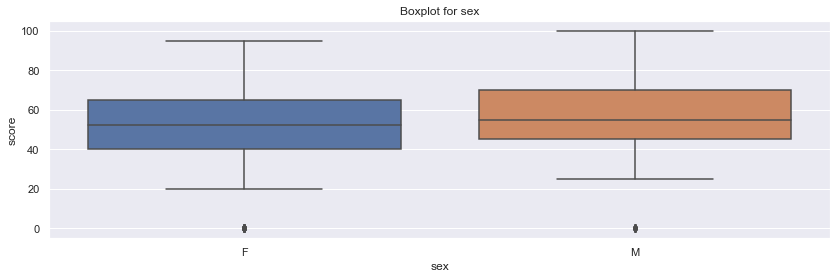

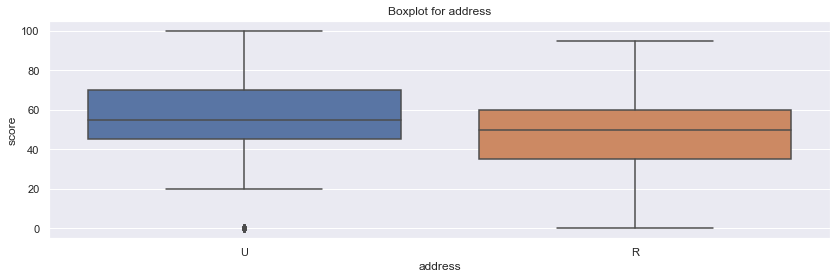

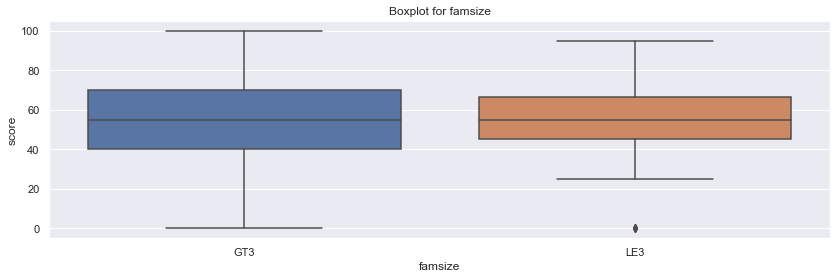

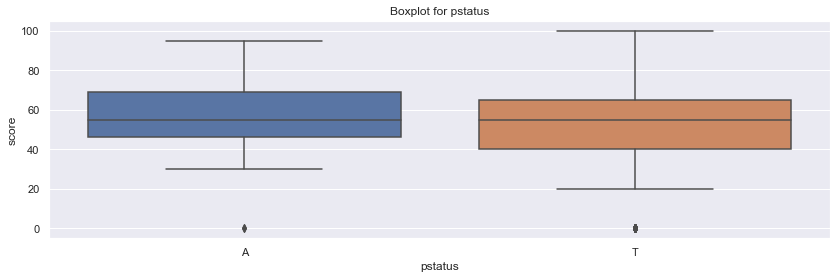

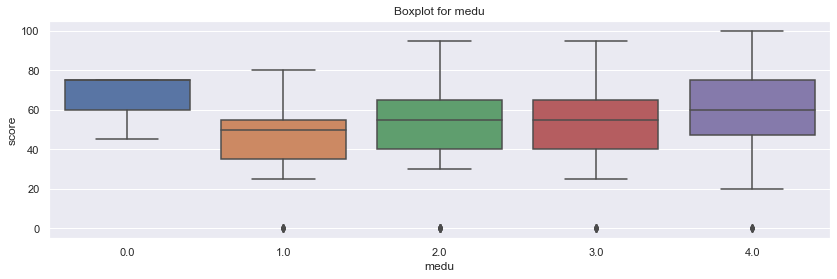

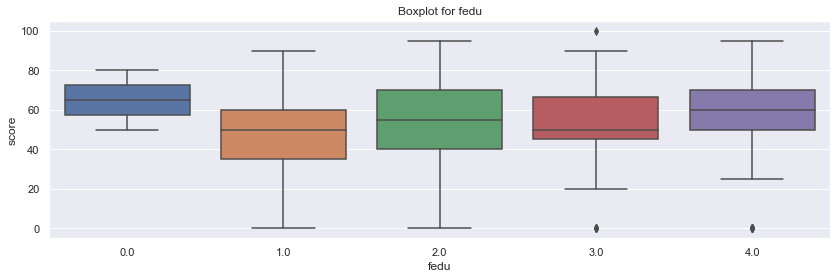

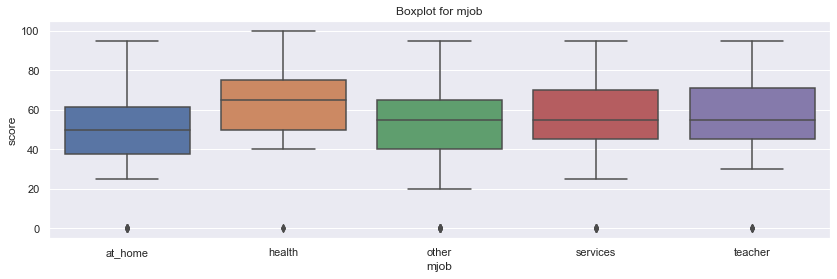

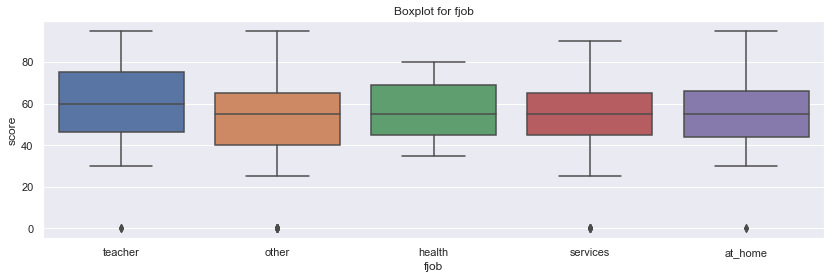

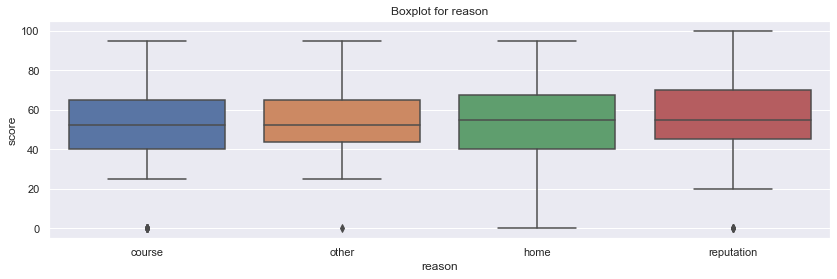

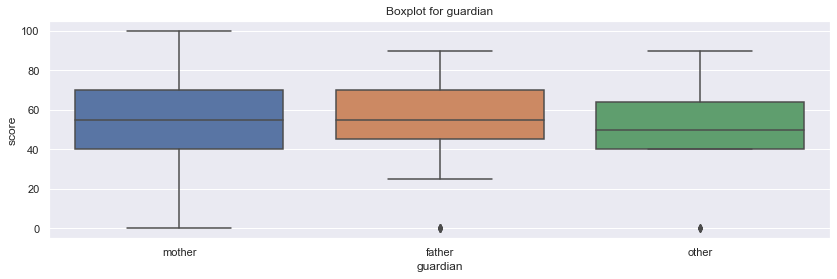

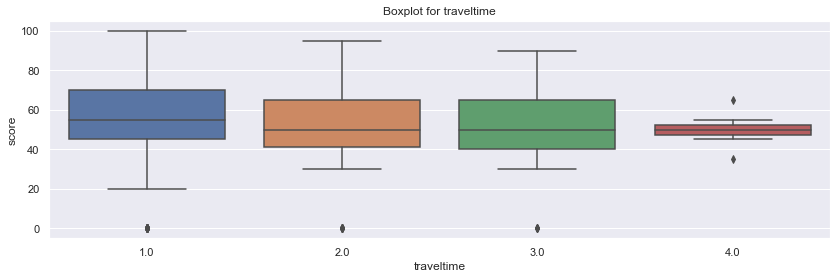

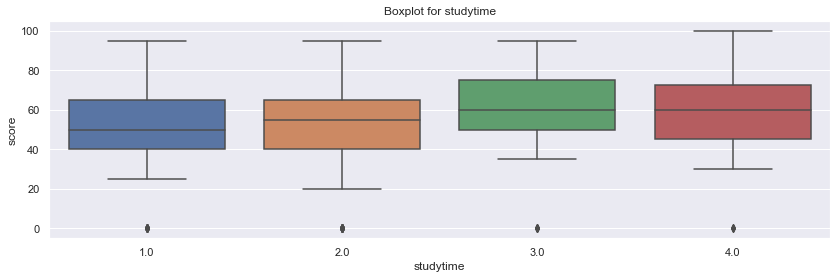

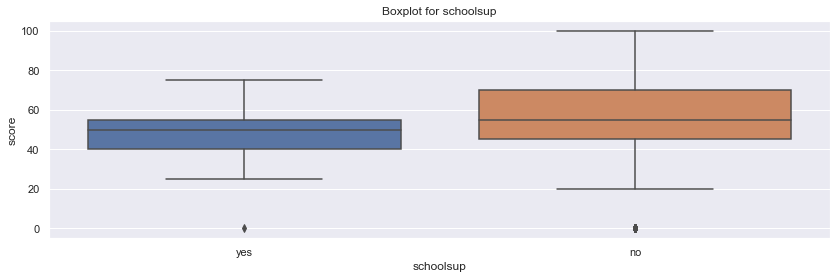

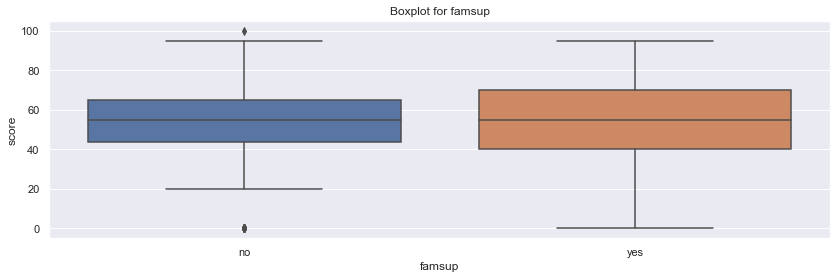

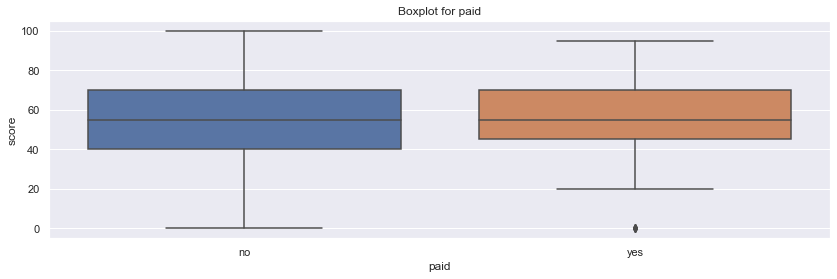

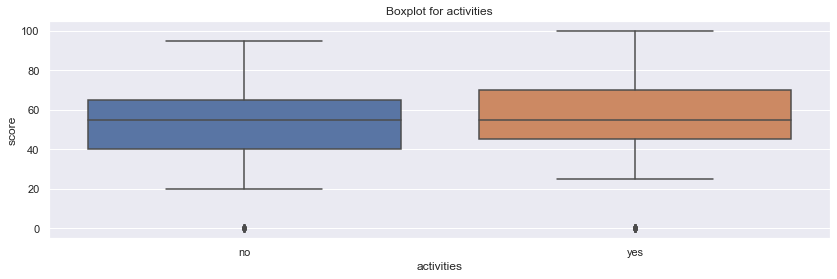

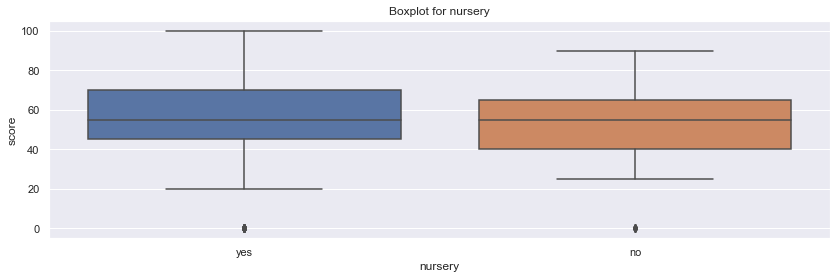

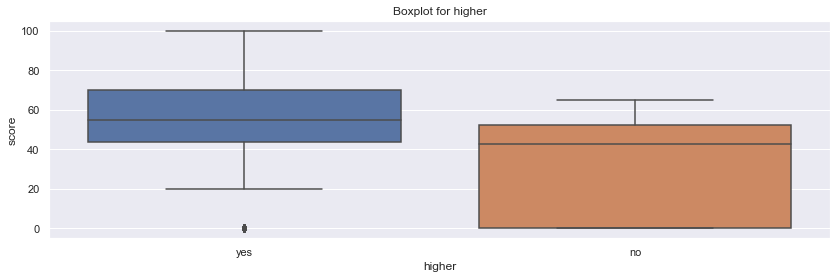

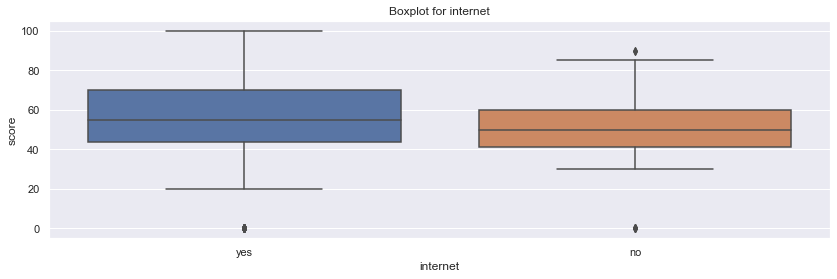

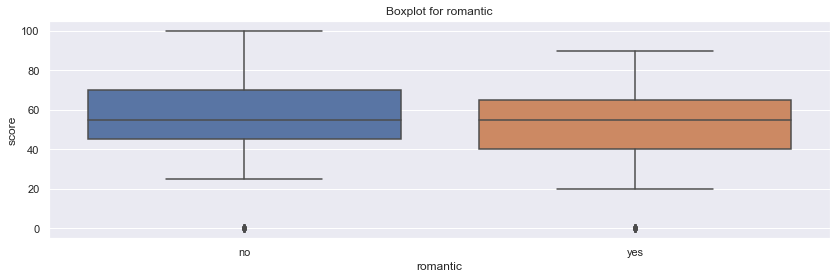

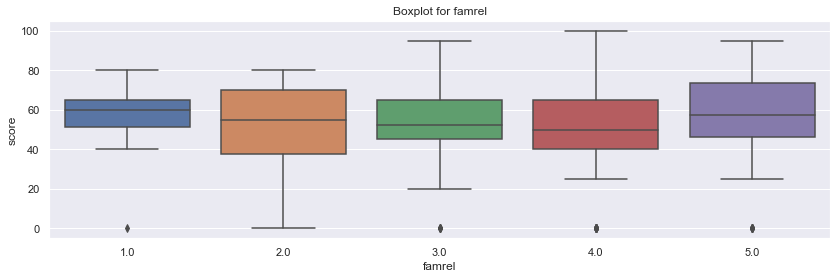

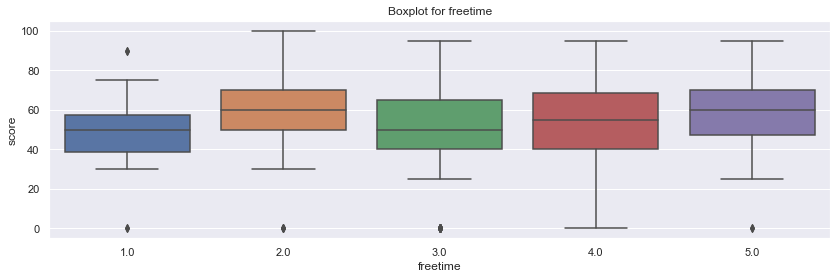

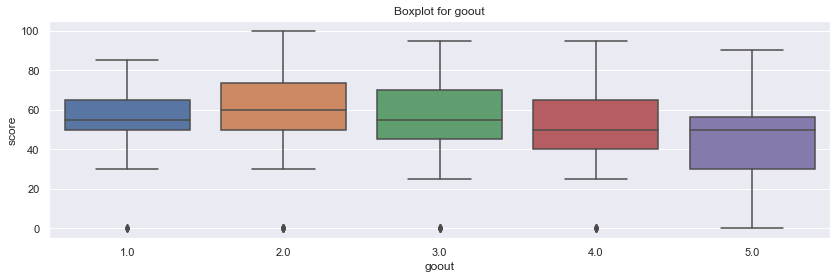

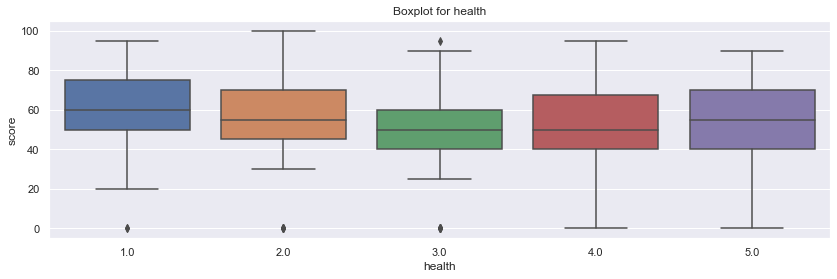

In [51]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', data=students, ax=ax)
    plt.xticks()
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu','mjob', 'fjob', 
            'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 
            'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel','freetime', 'goout', 'health']:
    get_boxplot(col)

In [71]:
ttest_ind(students.higher, students.score).pvalue 

TypeError: can only concatenate str (not "float") to str

In [53]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      376 non-null    object 
 1   sex         376 non-null    object 
 2   age         376 non-null    int64  
 3   address     361 non-null    object 
 4   famsize     352 non-null    object 
 5   pstatus     335 non-null    object 
 6   medu        373 non-null    float64
 7   fedu        352 non-null    float64
 8   mjob        358 non-null    object 
 9   fjob        341 non-null    object 
 10  reason      359 non-null    object 
 11  guardian    346 non-null    object 
 12  traveltime  348 non-null    float64
 13  studytime   371 non-null    float64
 14  failures    354 non-null    float64
 15  schoolsup   367 non-null    object 
 16  famsup      339 non-null    object 
 17  paid        337 non-null    object 
 18  activities  362 non-null    object 
 19  nursery     360 non-null    o

In [60]:
cols = students.columns.tolist()
combinations_all = list(combinations(cols, 2))
students.loc[students.columns.tolist() == combinations_all[0], 'score']

KeyError: False